In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

### runs in notebook_env

In [3]:
decline_onsets = [2450004,2450557,2451300,2451977,2452572,2452861,2453239,
                 2453699,2454112,2455590,2455921,2456086,2456394,2457139,
                 2457937,2458103]
decline_onsets = np.asarray(decline_onsets)

In [4]:
declines = decline_onsets-2450000
declines

array([   4,  557, 1300, 1977, 2572, 2861, 3239, 3699, 4112, 5590, 5921,
       6086, 6394, 7139, 7937, 8103])

In [5]:
time = np.arange(0,10000,1)
is_decline = np.zeros(len(time))
idx = np.isin(time, declines)
is_decline[idx] = 2

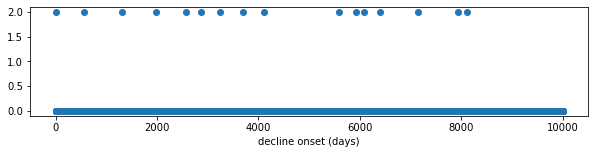

In [6]:
plt.figure(figsize=(10,2))
plt.scatter(time,is_decline)
plt.xlabel('decline onset (days)')
# plt.yticks([])
plt.show()

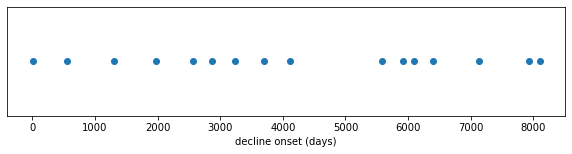

In [7]:
plt.figure(figsize=(10,2))
plt.scatter(decline_onsets-2450000,np.zeros(len(decline_onsets)))
plt.xlabel('decline onset (days)')
plt.yticks([])
plt.show()

In [8]:
from astropy.timeseries import LombScargle

In [9]:
def calc_lomb_scargle(t,y):
   oversample = 1
   tmax = t.max()
   tmin = t.min()
   df = 1.0 / (tmax - tmin)
   fmin = df
   fmax = 1 # maximum frequency in cycles per day (c/d)
 
   freq = np.arange(fmin, fmax, df / oversample)
   model = LombScargle(t, y)
   sc = model.power(freq, method="fast", normalization="psd")
 
   fct = np.sqrt(4./len(t))
   amp = np.sqrt(sc) * fct
   return freq, amp*1E6 # return frequency in muHz and amplitude in ppm

In [10]:
freq, amp = calc_lomb_scargle(time,is_decline)

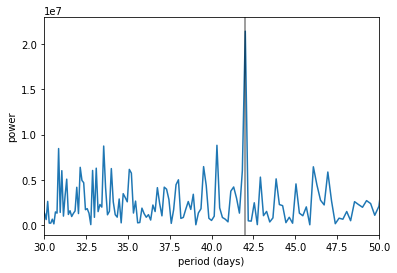

In [11]:
# plt.figure(figsize=(10,2))
plt.plot(1/freq,amp**2)
plt.axvline(42,color='k',alpha=0.5)
# plt.axvline(1/42,color='k',alpha=0.5)
plt.xlabel('period (days)')
plt.ylabel('power')
plt.xlim(30,50)
# plt.xlim(0,0.1)
# plt.yticks([])
plt.show()

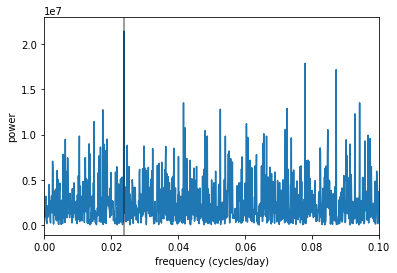

In [12]:
plt.plot(freq,amp**2)
# plt.axvline(42,color='k',alpha=0.5)
plt.axvline(1/42,color='k',alpha=0.5)
plt.xlabel('frequency (cycles/day)')
plt.ylabel('power')
# plt.xlim(30,50)
plt.xlim(0,0.1)
# plt.yticks([])
plt.show()